In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 1000)

In [14]:
elections1990_99 = pd.read_csv("Data/Elections/1990-99.csv", parse_dates = ["Date Filed", "Date Closed"])
elections2000_09 = pd.read_csv("Data/Elections/2000-09.csv", parse_dates = ["Date Filed", "Date Closed"])
elections2010_14 = pd.read_csv("Data/Elections/2010-14.csv", parse_dates = ["Date Filed", "Date Closed"])
elections2015_19 = pd.read_csv("Data/Elections/2015-19.csv", parse_dates = ["Date Filed", "Date Closed"])
elections2020_25 = pd.read_csv("Data/Elections/2020-25.csv", parse_dates = ["Date Filed", "Date Closed"])

In [15]:
elections = pd.concat([elections1990_99, elections2000_09, elections2010_14, elections2015_19, elections2020_25], 
                      ignore_index = True)

In [16]:
elections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33847 entries, 0 to 33846
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Region                        33847 non-null  object        
 1   Case Number                   33847 non-null  object        
 2   Case Name                     33847 non-null  object        
 3   Status                        33847 non-null  object        
 4   Date Filed                    33847 non-null  datetime64[ns]
 5   Date Closed                   33456 non-null  datetime64[ns]
 6   Reason Closed                 33452 non-null  object        
 7   City                          33846 non-null  object        
 8   States & Territories          33847 non-null  object        
 9   Unit ID                       33847 non-null  object        
 10  Ballot Type                   33847 non-null  object        
 11  Tally Type                  

In [18]:
elections['Tally Type'].value_counts()

Tally Type
Initial    32758
Rerun       1001
Run-off       87
Name: count, dtype: int64

In [19]:
elections['Ballot Type'].value_counts()

Ballot Type
Single Labor Organization    31138
Two Labor Organizations       1604
Revised Single Labor Org       627
UD                             322
Three Labor Organizations      120
Revised Two Labor Orgs          36
Name: count, dtype: int64

In [20]:
# Should be Chicago
elections[elections["City"].isna()]

,Region,Case Number,Case Name,Status,Date Filed,Date Closed,Reason Closed,City,States & Territories,Unit ID,...,Votes Against,Total Ballots Counted,Runoff Required,Challenged Ballots,Challenges are Determinative,Union to Certify,Voting Unit (Unit A),Voting Unit (Unit B),Voting Unit (Unit C),Voting Unit (Unit D)
28487,"Region 13, Chicago, Illinois",13-RC-320303,Starbucks Corporation,Closed,2023-06-20,2023-08-15,Certific. of Representative,NaN,IL,A,...,3.0,16.0,NaN,NaN,NaN,"Chicago and Midwest Regional Joint Board, Work...",Included: All full-time and regular part-time ...,NaN,NaN,NaN


In [21]:
elections.loc[25547, 'City'] = 'Chicago'

In [22]:
# RC = Representation election
# RD = Decertification, workers filed
# RM = Decertification, empoloyer filed (or, employer wants election, but surely that's never how it's used?)
# UD = Get rid of closed shop, workers filed
# UC = Unit clarification 
elections['Petition Type'] = elections["Case Number"].apply(lambda x: x.split("-")[1])
elections['Petition Type'].value_counts()

Petition Type
RC    28796
RD     3971
RM      706
UD      372
UC        2
Name: count, dtype: int64

In [23]:
# Parse union names - Will be imperfect due to typos etc, but gives a broad sense of things
def get_union(union_name):
    union_name = union_name.lower()
    union_name = union_name.replace("&", "and")
    union_name = union_name.replace(".", "")
    union_name = union_name.replace("*", "")
    union_name = union_name.replace(",", "")
    union_name = union_name.replace("'", "")
    union_name = union_name.replace("-", " ")
    union_name = union_name.replace("/", " ")
    union_name = union_name.replace("intl", "international")
    union_name = union_name.replace("ó", "o")
    union_name = union_name.replace("  ", " ")
    union_name = union_name.replace("  ", " ")
    union_name = union_name.replace("  ", " ")
    union_name = union_name.replace("  ", " ")
    if "ibew" in union_name or ("international brotherhood" in union_name and "electrical" in union_name) or "electrical worker" in union_name:
        union_name = "IBEW"
    if "seiu" in union_name or ("service employee" in union_name and "international union" in union_name) or "services employees international union" in union_name:
        union_name = "SEIU"
    if "cwa" in union_name or "communications workers of america" in union_name or "communication workers of america" in union_name or "commnications workers of america" in union_name:
        union_name = "CWA"
    if "ufcw" in union_name or "ucfw" in union_name or ("united food" in union_name and "commer" in union_name) or "united food and commerical" in union_name:
        union_name = "UFCW"
    if union_name[:3] == "iam" or "iamaw" in union_name or ("international association" in union_name and "machinists" in union_name) or "international association of machinists & aerospace workers" in union_name:
        union_name = "IAM"
    if "iuoe" in union_name or "i u o e" in union_name or ("international union" and "operating engineers" in union_name):
        union_name = "IUOE"
    if "nuhw" in union_name or "national union of healthcare workers" in union_name:
        union_name = "NUHW"
    if "spfpa" in union_name or "international union security police and fire professionals of america" in union_name:
        union_name = "SPFPA"
    if "uaw" in union_name or ("united auto" in union_name and "workers" in union_name):
        union_name = "UAW"
    if "teamster" in union_name or "ibt" in union_name or "teamter" in union_name:
        union_name = "TEAMSTERS"
    if "usw" == union_name[:3] or "steel" in union_name:
        union_name = "USW"
    if "ilwu" in union_name or "international longshore and warehouse union" in union_name:
        union_name = "ILWU"
    if "(ue)" in union_name or "united electrical radio" in union_name:
        union_name = "UE"
    if "unite here" in union_name or "unitehere" in union_name:
        union_name = "UNITE HERE"
    if "steamfitter" in union_name:
        union_name = "STEAMFITTERS"
    if "opeiu" in union_name or ("office" in union_name and "professional employees international" in union_name):
        union_name = "OPEIU"
    if "amalgamated transit" in union_name:
        union_name = "ATU"
    if  "iatse" in union_name or (("international alliance" in union_name or "international assoc" in union_name) and "theatrical" in union_name):
        union_name = "IATSE"
    if "afscme" in union_name or ("american federation" in union_name and "state county" in union_name and "municipal employee" in union_name) or "american federation of state county and municipal empoyees" in union_name:
        union_name = "AFSCME"
    if "rwdsu" in union_name or ("retail" in union_name and "wholesale" in union_name and "department store" in union_name):
        union_name = "RWDSU"
    if "nurse" in union_name or "nursing" in union_name or " nnu" in union_name:
        union_name = "NURSE UNION"
    if "police" in union_name or "patrolmen" in union_name or "public safety" in union_name or "law enforc" in union_name:
        union_name = "POLICE UNION"
    if "uscso" in union_name or "ugsoa" in union_name or "security" in union_name or "guard" in union_name or "officer" in union_name or "protective" in union_name:
        union_name = "SECURITY UNION"
    if "carpenter" in union_name:
        union_name = "CARPENTER UNION"
    if "iupat" in union_name or "painter" in union_name:
        union_name = "IUPAT"
    if "sag aftra" in union_name or "screen actors guild" in union_name:
        union_name = "SAG-AFTRA"
    if "apwu" in union_name or "american postal workers" in union_name:
        union_name = "APWU"
    if "upseu" in union_name or ("united professional" in union_name and "service employee" in union_name):
        union_name = "UPSEU"
    if "cgt" in union_name or ("central general" in union_name and "trabaja" in union_name):
        union_name = "CGT"
    if "ugt" in union_name or ("union general" in union_name and "trabaja" in union_name):
        union_name = "UGT"
    if "fct" in union_name or ("federacion central" in union_name and "traba" in union_name):
        union_name = "FCT"
    if "liuna" in union_name or "laborers international union" in union_name:
        union_name = "LIUNA"
    if "bricklayer" in union_name:
        union_name = "BAC"
    if "iww" in union_name or ("industrial worker" in union_name and "world" in union_name):
        union_name = "IWW"
    if "bctgm" in union_name or "bctmgm" in union_name or ("bakery" in union_name and "tobac" in union_name):
        union_name = "BCTGM"
    if 'workers united' == union_name[:14] or 'worker united' == union_name[:13]:
        union_name = "WORKERS UNITED"
    if 'ibotu' in union_name or ("international brotherhood" in union_name and "trade union" in union_name):
        union_name = "IBOTU"
    if 'mine worker' in union_name:
        union_name = "UMWA"
    if "writers guild" in union_name:
        union_name = "WGA"
    if "ufw" in union_name or "united farm work" in union_name:
        union_name = "UFW"
    if "heat" in union_name and "frost" in union_name:
        union_name = "INSULATORS UNION"
    if "iron worker" in union_name or "ironworker" in union_name:
        union_name = "IRON WORKERS"
    if "boilermaker" in union_name:
        union_name = "BOILERMAKERS"
    if "emts" in union_name or "ems" in union_name.split() or "emergency" in union_name or "paramedic" in union_name or "fire" in union_name:
        union_name = "EMERGENCY SERVICES UNION"
    if "teach" in union_name or "educat" in union_name or "school" in union_name or " aft " in union_name or "aft" == union_name[:3] or " nea " in union_name or "nea" == union_name[:3]:
        union_name = "TEACHER UNION"
    if "laborer" in union_name:
        union_name = "LABORER UNION"
    if "patco" in union_name or "natco" in union_name or "air traffic controller" in union_name:
        union_name = "AIR TRAFFIC CONTROLLER UNION"
    if "driver" in union_name:
        union_name = "DRIVERS UNION"
    if "atu" == union_name[:3] or "transit union" in union_name or "transport" in union_name:
        union_name = "TRANSIT WORKERS UNION"
    if "metal" in union_name or "smwia" in union_name:
        union_name = "METAL WORKERS"
    if "health" in union_name or "hospital" in union_name:
        union_name = "HEALTHCARE UNION"
    if "utility worker" in union_name:
        union_name = "UTILITY WORKER UNION"
    if "service worker" in union_name or "uswu" in union_name:
        union_name = "SERVICE WORKER UNION"
    if "sprinkler" in union_name or "plumb" in union_name or "pipe" in union_name:
        union_name = "PIPEFITTERS/PLUMBERS/SPRINKLERFITTERS"
    if 'nan' == union_name or "" == "".join(union_name.split()):
        union_name = "OTHER"
    if '(alu)' in union_name or 'amazon' in union_name:
        union_name = 'ALU'
    if union_name.islower():
        return "OTHER"
    return union_name

In [24]:
union_name = elections['Labor Union1'].astype(str).apply(get_union)

In [25]:
union_name.value_counts()

Labor Union1
TEAMSTERS                                6974
SEIU                                     3847
OTHER                                    2543
UFCW                                     2303
IUOE                                     1937
IBEW                                     1932
IAM                                      1864
USW                                      1105
SECURITY UNION                            908
AFSCME                                    820
CWA                                       764
SPFPA                                     654
UAW                                       634
NURSE UNION                               608
TEACHER UNION                             420
ATU                                       408
POLICE UNION                              391
LIUNA                                     367
UNITE HERE                                356
PIPEFITTERS/PLUMBERS/SPRINKLERFITTERS     347
IATSE                                     346
TRANSIT WORKERS UNION

In [26]:
# Note that this is only for Labor Union1; other labor unions in the election are ignored. 
# This will cause problems for some entries (e.g. Case Number 32-RC-005775), but we will be
# analyzing only those elections with a single labor union involved.
elections['Union'] = union_name 

In [27]:
# Calculate turnout - Some of these are larger than 1, clearly wrong!
turnout = elections["Total Ballots Counted"]/elections["No of Eligible Voters"]
print(f"There are {len(turnout[turnout > 1])} elections where turnout is over 100%")
print(f"There are {len(turnout[turnout == 1])} elections where turnout is exactly 100%")

There are 245 elections where turnout is over 100%
There are 7466 elections where turnout is exactly 100%


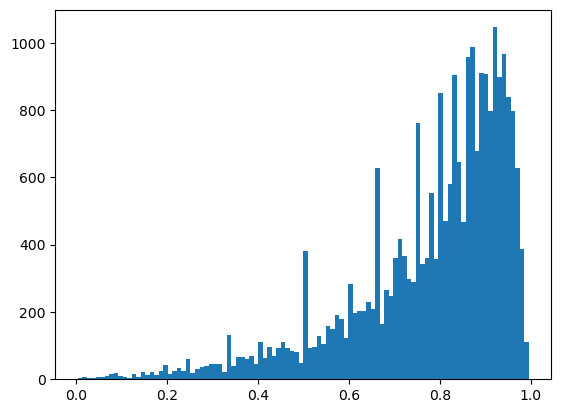

In [28]:
# Histogram of turnouts less than 100%
plt.hist(turnout[turnout < 1], bins = 100)
plt.show()

In [29]:
elections['Turnout'] = turnout

In [30]:
# For some reason this case breaks into two rows when writing to CSV.
# Can't figure it out, so I'm throwing it away. It's a small 2010 
# election of Las Vegas security officers so not a big deal.
elections = elections[elections["Case Number"] != "28-RC-006728"]

In [31]:
elections['Case Name'] = elections['Case Name'].apply(str.title)

In [32]:
elections.to_csv("data/Elections/all_elections.csv", index = False)